# mmdholecenter
Hole center misalignment in PCB.

# Description

The input image is a binary image of a gear. The opening top-hat is used to detect the gear teeth. Finally, the teeth detected are labeled.


In [1]:
import numpy as np
from PIL import Image
import ia870 as ia
import matplotlib.pyplot as plt

# Reading

The image of the PCB is read. 

(-0.5, 255.5, 199.5, -0.5)

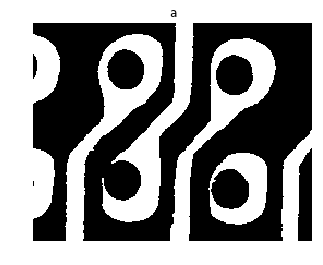

In [2]:
a_pil = Image.open('../data/pcbholes.tif').convert('L')
a = np.array (a_pil)
a = a.astype('bool')
(fig, axes) = plt.subplots(nrows=1, ncols=1,figsize=(5, 5))
axes.set_title('a')
axes.imshow(a, cmap='gray')
axes.axis('off')

# First, find center of the pads.

Use the close hole function to remove the holes. Note that one hole is open. This is not considered in this experiment. The regional maxima of the distance transform gives the radius of the largest disk inside the pad. We are interested only in radius larger than 20 pixels.

(-0.5, 255.5, 199.5, -0.5)

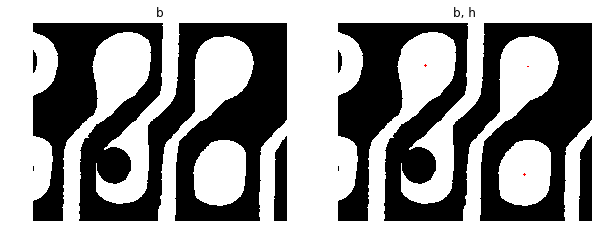

In [3]:
b = ia.iaclohole(a)
d = ia.iadist(b,ia.iasecross(),'EUCLIDEAN')
e = ia.iaregmax(d,ia.iasebox())
f = ia.iathreshad(d, np.uint16(20))  # radius larger than 20 pixels
g = ia.iaintersec(e,f)
h = ia.iablob(ia.ialabel(g,ia.iasebox()),'CENTROID') # pad center

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('b')
axes[0].imshow(b, cmap='gray')
axes[0].axis('off')
axes[1].set_title('b, h')
axes[1].imshow(ia.iagshow(b, ia.iadil(h)).transpose(1, 2, 0))
axes[1].axis('off')

## Find the center of the holes

The holes are given by the difference of the pad image from the original image. Repeat the same procedure to find the center of the pads to find now the center of the holes. 

(-0.5, 255.5, 199.5, -0.5)

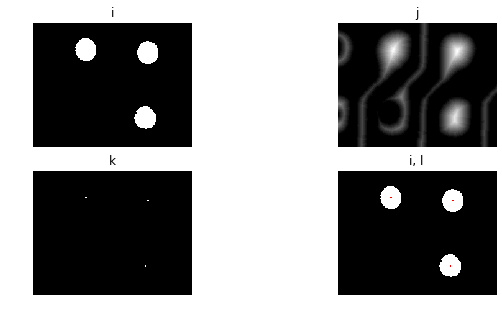

In [4]:
i = ia.iasubm(b,a)
j = ia.iadist(i,ia.iasecross(),'EUCLIDEAN')
k = ia.iaregmax(j,ia.iasebox())
l = ia.iablob(ia.ialabel(k,ia.iasebox()),'CENTROID') # hole center

(fig, axes) = plt.subplots(nrows=2, ncols=2,figsize=(10, 5))
axes[0][0].set_title('i')
axes[0][0].imshow(ia.iagshow(i).transpose(1, 2, 0))
axes[0][0].axis('off')
axes[0][1].set_title('j')
axes[0][1].imshow(d, cmap='gray')
axes[0][1].axis('off')
axes[1][0].set_title('k')
axes[1][0].imshow(ia.iagshow(ia.iadil(k)).transpose(1, 2, 0))
axes[1][0].axis('off')
axes[1][1].set_title('i, l')
axes[1][1].imshow(ia.iagshow(i, ia.iadil(l)).transpose(1, 2, 0))
axes[1][1].axis('off')

## Show the eccentricity

First both centers (pads and holes) are displayed together. Then the actual misalignment is computed using the distance from one point to the other. 

[ 43  44 153] [ 88 191 187] [3 8 6]


(-0.5, 255.5, 199.5, -0.5)

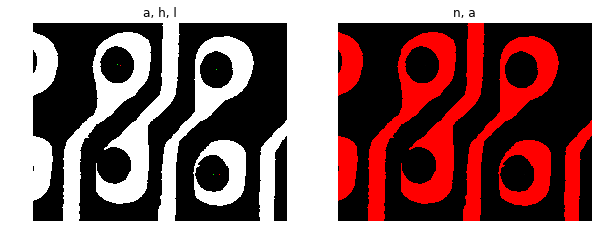

In [5]:
m = ia.iadist(ia.ianeg(l),ia.iasecross(),'EUCLIDEAN');
n = ia.iaintersec(ia.iagray(h),np.uint8(m));
[x,y]=np.nonzero(n);
v = n[np.nonzero(n)]
print (x, y, v)

#fprintf('displacement of %d at (%d,%d)\n',[double(v)';x';y']);

#displacement of 3 at (44,89)
#displacement of 6 at (154,188)
#displacement of 8 at (45,192)

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('a, h, l')
axes[0].imshow(ia.iagshow(a, h, l).transpose(1, 2, 0))
axes[0].axis('off')
axes[1].set_title('n, a')
axes[1].imshow(ia.iagshow(n, a).transpose(1, 2, 0))
axes[1].axis('off')


## Find the narrowest region around the holes

First, the thinning to compute the skeleton of the PCB image, then remove iteratively all the end points of the skeleton so just the skeleton loop around the holes remains. Find the minimum distance of these loops to the border and display their location. 

[7. 7. 3.]


(-0.5, 255.5, 199.5, -0.5)

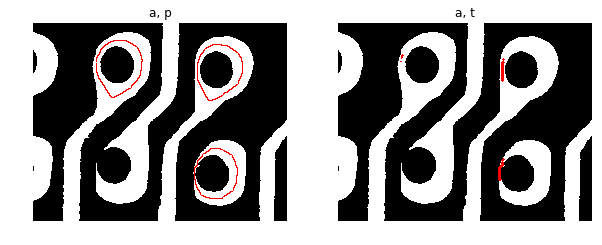

In [6]:
o=ia.iathin(a)
p=ia.iathin(o,ia.iaendpoints())
q = ia.iadist(a,ia.iasecross(),'EUCLIDEAN')
r = ia.iagrain(ia.ialabel(p,ia.iasebox()),q,'min') # minimum
s = ia.iagrain(ia.ialabel(p,ia.iasebox()),q,'min','data'); # minimum
t = ia.iaintersec(ia.iacmp(r,'==',q),a);

print (2*s+1)
#fprintf('Minimum distance: %d pixels\n',2*double(s)+1);
#Minimum distance: 7 pixels
#Minimum distance: 3 pixels
#Minimum distance: 7 pixels

(fig, axes) = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
axes[0].set_title('a, p')
axes[0].imshow(ia.iagshow(a, p).transpose(1, 2, 0))
axes[0].axis('off')
axes[1].set_title('a, t')
axes[1].imshow(ia.iagshow(a, ia.iadil(t)).transpose(1, 2, 0))
axes[1].axis('off')